### Задание 2.

Произведено = 100 измерений некоторой случайной величины. Результаты представлены в таблице в виде статистического ряда. Построить гистограмму выдвинуть гипотезу о законе распределения с в. и проверить, на сколько она согласуется с экспериментом (проверить модель на адекватность по критерию Пирсона).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

# -----------------------------
# Исходные данные
# -----------------------------
# Интервалы (открытые границы для удобства аппроксимации):
# Интервалы: (0;2), (2;4), (4;6), (6;8), (8;10), (10;12)
# Частоты (число попаданий):
intervals = np.array([[0, 2],
                      [2, 4],
                      [4, 6],
                      [6, 8],
                      [8, 10],
                      [10, 12]])
frequencies = np.array([8, 11, 32, 28, 7, 14])
N = 100  # число измерений

print("Исходные данные:")
print("Интервалы:")
for i, (a, b) in enumerate(intervals):
    print(f"  Интервал {i+1}: ({a};{b})")
print("Частоты попаданий для каждого интервала:")
for i, freq in enumerate(frequencies):
    print(f"  Интервал {i+1}: {freq}")
print(f"Общее число измерений: N = {N}")
print("\n" + "="*60 + "\n")

Исходные данные:
Интервалы:
  Интервал 1: (0;2)
  Интервал 2: (2;4)
  Интервал 3: (4;6)
  Интервал 4: (6;8)
  Интервал 5: (8;10)
  Интервал 6: (10;12)
Частоты попаданий для каждого интервала:
  Интервал 1: 8
  Интервал 2: 11
  Интервал 3: 32
  Интервал 4: 28
  Интервал 5: 7
  Интервал 6: 14
Общее число измерений: N = 100




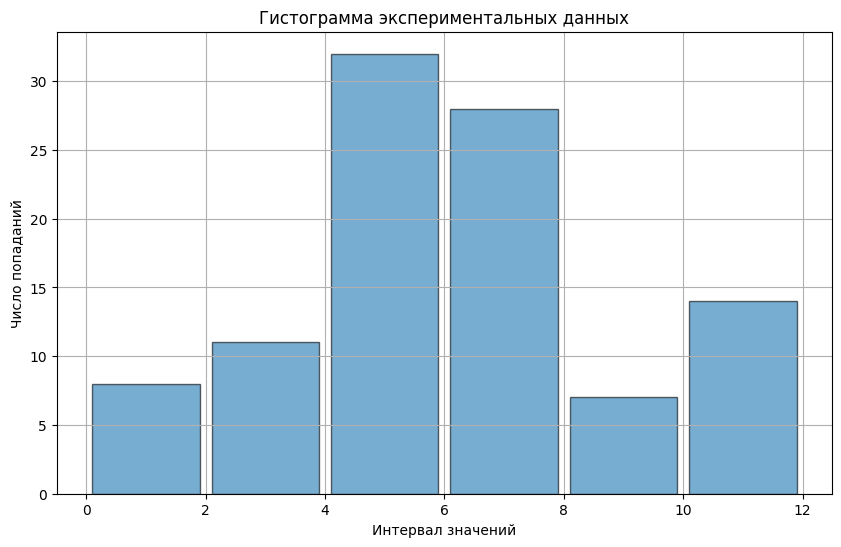

In [2]:
# ================================
# 1. Построение гистограммы экспериментальных данных
# ================================
# Определим центры каждого интервала, которые будем считать представителями интервалов
centers = intervals.mean(axis=1)
widths = intervals[:,1] - intervals[:,0]

plt.figure(figsize=(10, 6))
plt.bar(centers, frequencies, width=widths*0.9, align='center',
        alpha=0.6, edgecolor='black', label='Экспериментальные данные')
plt.xlabel('Интервал значений')
plt.ylabel('Число попаданий')
plt.title('Гистограмма экспериментальных данных')
plt.grid(True)

In [3]:
# ================================
# 2. Оценка параметров нормального распределения
# ================================
# Выдвигаем гипотезу, что случайная величина имеет нормальное распределение.
# В таком случае можно оценить параметры (математическое ожидание и дисперсию)
# по "центрам" интервалов с учётом весов (частот).

# Оценка математического ожидания (среднего):
mean_est = np.sum(centers * frequencies) / N
# Оценка дисперсии:
var_est = np.sum(frequencies * (centers - mean_est)**2) / N
std_est = np.sqrt(var_est)

print("Оценка параметров нормального распределения:")
print("Расчёт математического ожидания (μ):")
print("  μ = (Σ (центр интервала * частота)) / N")
for i, (center, freq) in enumerate(zip(centers, frequencies)):
    print(f"    Интервал {i+1}: {center:.2f} * {freq} = {center*freq:.2f}")
print(f"  Σ (центр * частота) = {np.sum(centers * frequencies):.2f}")
print(f"  N = {N}")
print(f"  → μ = {mean_est:.2f}\n")

print("Расчёт дисперсии (σ²):")
print("  σ² = (Σ (частота * (центр - μ)²)) / N")
for i, (center, freq) in enumerate(zip(centers, frequencies)):
    diff2 = (center - mean_est)**2
    print(f"    Интервал {i+1}: {freq} * ({center:.2f} - {mean_est:.2f})² = {freq*diff2:.2f}")
print(f"  Σ (частота * (центр - μ)²) = {np.sum(frequencies * (centers - mean_est)**2):.2f}")
print(f"  → σ² = {var_est:.2f},  σ = {std_est:.2f}")
print("\n" + "="*60 + "\n")

Оценка параметров нормального распределения:
Расчёт математического ожидания (μ):
  μ = (Σ (центр интервала * частота)) / N
    Интервал 1: 1.00 * 8 = 8.00
    Интервал 2: 3.00 * 11 = 33.00
    Интервал 3: 5.00 * 32 = 160.00
    Интервал 4: 7.00 * 28 = 196.00
    Интервал 5: 9.00 * 7 = 63.00
    Интервал 6: 11.00 * 14 = 154.00
  Σ (центр * частота) = 614.00
  N = 100
  → μ = 6.14

Расчёт дисперсии (σ²):
  σ² = (Σ (частота * (центр - μ)²)) / N
    Интервал 1: 8 * (1.00 - 6.14)² = 211.36
    Интервал 2: 11 * (3.00 - 6.14)² = 108.46
    Интервал 3: 32 * (5.00 - 6.14)² = 41.59
    Интервал 4: 28 * (7.00 - 6.14)² = 20.71
    Интервал 5: 7 * (9.00 - 6.14)² = 57.26
    Интервал 6: 14 * (11.00 - 6.14)² = 330.67
  Σ (частота * (центр - μ)²) = 770.04
  → σ² = 7.70,  σ = 2.77




In [4]:
# ================================
# 3. Расчёт теоретических частот по нормальному закону
# ================================
# Для нормального распределения вероятность попадания в интервал (a, b) вычисляется по формуле:
#   P(a < X < b) = Φ((b-μ)/σ) - Φ((a-μ)/σ),
# где Φ - функция распределения нормального распределения.
def theoretical_prob(a, b, mean, std):
    return norm.cdf(b, loc=mean, scale=std) - norm.cdf(a, loc=mean, scale=std)

theoretical_freq = np.array([N * theoretical_prob(a, b, mean_est, std_est)
                             for a, b in intervals])

print("Расчёт теоретических частот по нормальному закону:")
for i, ((a, b), freq_theor) in enumerate(zip(intervals, theoretical_freq)):
    prob = theoretical_prob(a, b, mean_est, std_est)
    print(f"  Интервал {i+1} ({a};{b}):")
    print(f"    Вероятность попадания = Φ(({b} - {mean_est:.2f})/{std_est:.2f}) - Φ(({a} - {mean_est:.2f})/{std_est:.2f}) = {prob:.4f}")
    print(f"    Теоретическая частота = {N} * {prob:.4f} = {freq_theor:.2f}")
print("\n" + "="*60 + "\n")

Расчёт теоретических частот по нормальному закону:
  Интервал 1 (0;2):
    Вероятность попадания = Φ((2 - 6.14)/2.77) - Φ((0 - 6.14)/2.77) = 0.0544
    Теоретическая частота = 100 * 0.0544 = 5.44
  Интервал 2 (2;4):
    Вероятность попадания = Φ((4 - 6.14)/2.77) - Φ((2 - 6.14)/2.77) = 0.1524
    Теоретическая частота = 100 * 0.1524 = 15.24
  Интервал 3 (4;6):
    Вероятность попадания = Φ((6 - 6.14)/2.77) - Φ((4 - 6.14)/2.77) = 0.2596
    Теоретическая частота = 100 * 0.2596 = 25.96
  Интервал 4 (6;8):
    Вероятность попадания = Φ((8 - 6.14)/2.77) - Φ((6 - 6.14)/2.77) = 0.2688
    Теоретическая частота = 100 * 0.2688 = 26.88
  Интервал 5 (8;10):
    Вероятность попадания = Φ((10 - 6.14)/2.77) - Φ((8 - 6.14)/2.77) = 0.1692
    Теоретическая частота = 100 * 0.1692 = 16.92
  Интервал 6 (10;12):
    Вероятность попадания = Φ((12 - 6.14)/2.77) - Φ((10 - 6.14)/2.77) = 0.0648
    Теоретическая частота = 100 * 0.0648 = 6.48




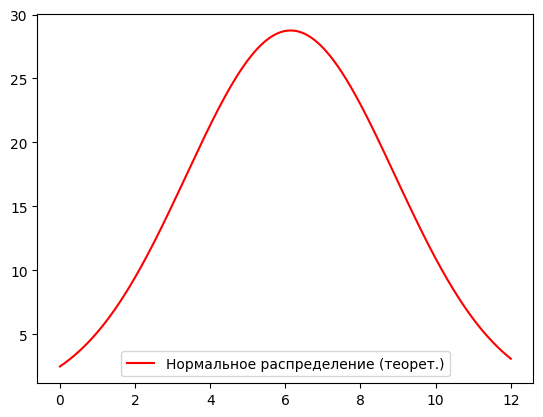

In [5]:
# ================================
# 4. Отображение теоретической кривой плотности на гистограмме
# ================================
# Построим кривую плотности нормального распределения с оценёнными параметрами.
x_plot = np.linspace(0, 12, 300)
pdf = norm.pdf(x_plot, loc=mean_est, scale=std_est)
# Для сопоставления с гистограммой (которая отражает абсолютные частоты)
# масштабируем плотность: умножаем на среднюю ширину интервала и общее число измерений.
avg_width = np.mean(widths)
scaled_pdf = pdf * avg_width * N

plt.plot(x_plot, scaled_pdf, 'r-', label='Нормальное распределение (теорет.)')
plt.legend()
plt.show()

In [6]:
# ================================
# 5. Проверка гипотезы по критерию Пирсона (хи-квадрат)
# ================================
# Критерий Пирсона рассчитывается по формуле:
#   χ² = Σ [(O_i - E_i)² / E_i],
# где O_i - наблюдаемая частота в интервале, E_i - теоретическая.
chi2_stat = np.sum((frequencies - theoretical_freq)**2 / theoretical_freq)
# Степени свободы: число интервалов (k) - число оценённых параметров (p=2: μ и σ) - 1.
df = len(frequencies) - 2 - 1
p_value = 1 - chi2.cdf(chi2_stat, df)

print("Проверка гипотезы по критерию Пирсона (хи-квадрат):")
print("  Формула: χ² = Σ ((O_i - E_i)² / E_i)")
for i, (O, E) in enumerate(zip(frequencies, theoretical_freq)):
    term = (O - E)**2 / E
    print(f"    Интервал {i+1}: (O - E)²/E = ({O:.2f} - {E:.2f})²/{E:.2f} = {term:.2f}")
print(f"  → χ² = {chi2_stat:.2f}")
print(f"Степени свободы: df = k - p - 1 = {len(frequencies)} - 2 - 1 = {df}")
print(f"p-value = {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("Результат: Гипотеза о нормальном распределении принимается (нет оснований её отвергнуть).")
else:
    print("Результат: Гипотеза о нормальном распределении отвергается.")

Проверка гипотезы по критерию Пирсона (хи-квадрат):
  Формула: χ² = Σ ((O_i - E_i)² / E_i)
    Интервал 1: (O - E)²/E = (8.00 - 5.44)²/5.44 = 1.20
    Интервал 2: (O - E)²/E = (11.00 - 15.24)²/15.24 = 1.18
    Интервал 3: (O - E)²/E = (32.00 - 25.96)²/25.96 = 1.41
    Интервал 4: (O - E)²/E = (28.00 - 26.88)²/26.88 = 0.05
    Интервал 5: (O - E)²/E = (7.00 - 16.92)²/16.92 = 5.82
    Интервал 6: (O - E)²/E = (14.00 - 6.48)²/6.48 = 8.74
  → χ² = 18.40
Степени свободы: df = k - p - 1 = 6 - 2 - 1 = 3
p-value = 0.0004
Результат: Гипотеза о нормальном распределении отвергается.
